In [2]:
import tensorflow
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import statistics

# tensorflow libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback

# sklearn libraries are useful for preprocessing, performance measures, etc.
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# Read Data

In [3]:
df = pd.read_csv('./features_30_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [4]:

df['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

Split and scale dataset

In [5]:
columns_to_drop = ['label','filename', 'length']

def prepare_dataset(df, columns_to_drop, test_size, random_state):

    # Encode the labels from 0 to n_classes-1  
    label_encoder = preprocessing.LabelEncoder()
    df['label'] = label_encoder.fit_transform(df['label'])
  
    # devide data to train and test
    df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)
    
    # scale the training inputs
    x_train = df_train.drop(columns_to_drop,axis=1)
    y_train = df_train['label'].to_numpy()
    
    standard_scaler = preprocessing.StandardScaler()
    x_train_scaled = standard_scaler.fit_transform(x_train)

    #scale and prepare testing data
    x_test = df_test.drop(columns_to_drop,axis=1)
    x_test_scaled = standard_scaler.transform(x_test)
    y_test = df_test['label'].to_numpy()
  
    return x_train_scaled, y_train, x_test_scaled, y_test

In [6]:
X_train, y_train, X_test, y_test = prepare_dataset(df, columns_to_drop, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(700, 57) (700,)
(300, 57) (300,)


# Q1a. Defining DNN

In [7]:
#DNN with 1 hidden layer 

def adam_optimizer(no_neurons):
    network = Sequential([
        Dense(no_neurons, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])

    network.compile(optimizer='Adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
    return network

In [8]:
history = adam_optimizer(no_neurons=16).fit(X_train, y_train,
                                            batch_size=1,
                                            epochs=50, 
                                            verbose = 2, 
                                            use_multiprocessing=True,
                                            validation_data=(X_test, y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 700 samples, validate on 300 samples
Epoch 1/50
 - 2s - loss: 2.1065 - acc: 0.2443 - val_loss: 1.6984 - val_acc: 0.4167
Epoch 2/50
 - 2s - loss: 1.6477 - acc: 0.4000 - val_loss: 1.4415 - val_acc: 0.4900
Epoch 3/50
 - 2s - loss: 1.4456 - acc: 0.4629 - val_loss: 1.3540 - val_acc: 0.5367
Epoch 4/50
 - 2s - loss: 1.3761 - acc: 0.4986 - val_loss: 1.3052 - val_acc: 0.5500
Epoch 5/50
 - 2s - loss: 1.2580 - acc: 0.5257 - val_loss: 1.1969 - val_acc: 0.5833
Epoch 6/50
 - 2s - loss: 1.1618 - acc: 0.5643 - val_loss: 1.1821 - val_acc: 0.5867
Epoch 7/50
 - 2s - loss: 1.1366 - acc: 0.5943 - val_loss: 1.1582 - val_acc: 0.6000
Epoch 8/50
 - 2s - loss: 1.1757 - acc: 0.6129 - val_loss: 1.1283 - val_acc: 0.6233
Epoch 9/50
 - 2s - loss: 1.0592 - acc: 0.6257 - val_loss: 1.1016 - val_acc: 0.6000
Epoch 10/50
 - 2s - 

# Q1b. Plot accuracies against training epochs and comments on plots

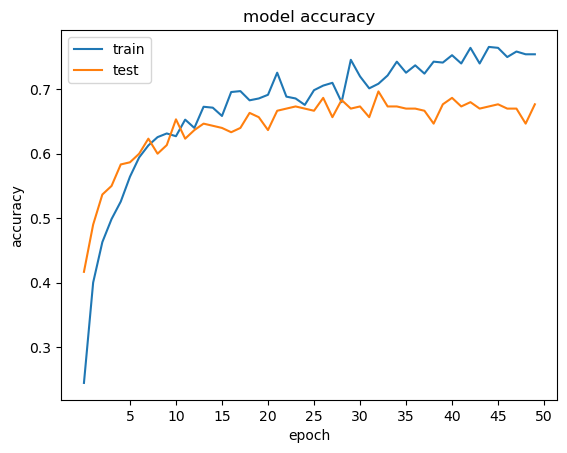

In [9]:
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## Comments
## The accuracies for both generally increases, and reaches stagnant of accuracy of 0.75 for train accuracy, and 0.67 for test accuracy

# Q1c. Plot accuracies against training epochs and state number of epoch test error converge

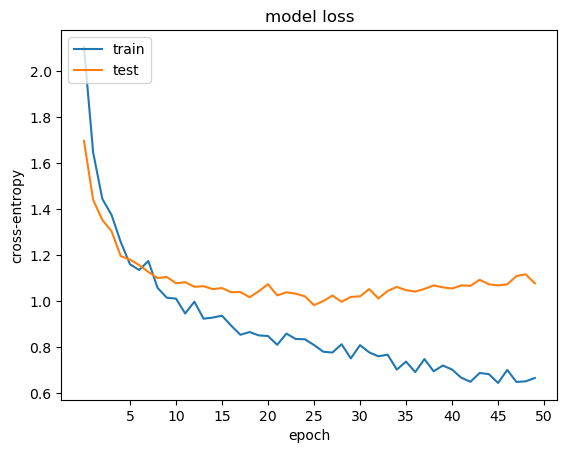

In [10]:
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('cross-entropy')
plt.xlabel('epoch')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Number of epochs where the test error begins to converge = 5

# 2a. Plot mean cross-validation accuracies over the training epochs with different batch sizes

In [8]:
no_folds = 3
no_data = df.shape[0]
nf = no_data//no_folds


#preparing data sets
df = df.sample(frac=1).reset_index(drop=True)
X = df.drop(columns_to_drop,axis=1)
standard_scaler = preprocessing.StandardScaler()
X = standard_scaler.fit_transform(X)
Y = df['label'].to_numpy()


def train_3_fold(X, Y, batch_size, epoch_size, callback=[]):
    acc = []
    mean_acc =[]
    acc_idx=0
    for i in batch_size:
        print('Train with batch size = %d'%(i))
        for fold in range(no_folds):
            start, end = fold*nf, (fold+1)*nf
            x_test, y_test = X[start:end], Y[start:end]
            x_train  = np.append(X[:start], X[end:], axis=0)
            y_train = np.append(Y[:start], Y[end:], axis=0) 
            
            history = adam_optimizer(no_neurons=16).fit(x_train, y_train,
                                                        batch_size=i,
                                                        epochs=epoch_size,
                                                        verbose=0,
                                                        use_multiprocessing=True,
                                                        callbacks=callback,
                                                        validation_data=(x_test, y_test))

            acc.append(history.history['val_acc'][epoch_size-1])
            print('fold %d test accuracy %g'%(fold, acc[acc_idx]))
            acc_idx+=1
        mean_acc.append(np.mean(acc))
        print('* mean accuracy = %g *'% np.mean(acc))
        acc.clear()
        acc_idx=0
    return mean_acc
        
    


In [12]:
batch_sizes = [1,4,8,16,32,64]
accuracy = train_3_fold(X, Y, batch_size=batch_sizes, epoch_size=50)


Train with batch size = 1
fold 0 test accuracy 0.684685
fold 1 test accuracy 0.672673
fold 2 test accuracy 0.684685
* mean accuracy = 0.680681 *
Train with batch size = 4
fold 0 test accuracy 0.6997
fold 1 test accuracy 0.678679
fold 2 test accuracy 0.666667
* mean accuracy = 0.681682 *
Train with batch size = 8
fold 0 test accuracy 0.663664
fold 1 test accuracy 0.678679
fold 2 test accuracy 0.678679
* mean accuracy = 0.673674 *
Train with batch size = 16
fold 0 test accuracy 0.693694
fold 1 test accuracy 0.645646
fold 2 test accuracy 0.624625
* mean accuracy = 0.654655 *
Train with batch size = 32
fold 0 test accuracy 0.642643
fold 1 test accuracy 0.627628
fold 2 test accuracy 0.660661
* mean accuracy = 0.643644 *
Train with batch size = 64
fold 0 test accuracy 0.624625
fold 1 test accuracy 0.591592
fold 2 test accuracy 0.594595
* mean accuracy = 0.603604 *


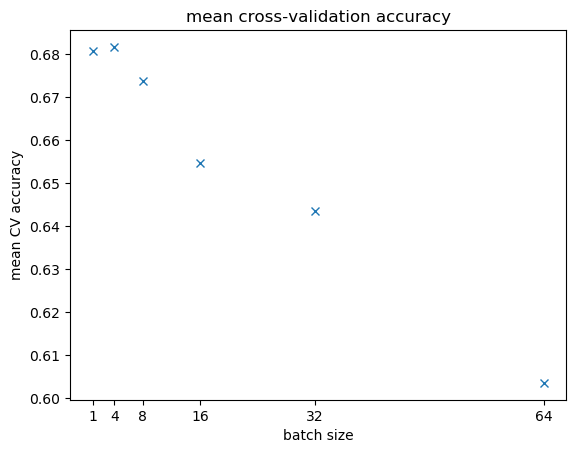

In [13]:
plt.figure(3)
plt.plot(batch_sizes,accuracy,marker='x',linestyle='None')
plt.title('mean cross-validation accuracy')
plt.ylabel('mean CV accuracy')
plt.xlabel('batch size')
plt.xticks(batch_sizes)
plt.show()



# 2b. Table of median time taken to train the network for one epoch against different batch sizes.

In [9]:
#introduce calllback

class TimingCallback(Callback):
    def __init__(self, logs={}):
        self.times=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = time.time()
    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time()-self.starttime)

cb = TimingCallback()

In [11]:
#recording the times for training
batch_sizes = [1,4,8,16,32,64]
time_records = train_3_fold(X, Y, batch_size=batch_sizes, epoch_size=50, callback=[cb])

Train with batch size = 1
fold 0 test accuracy 0.693694
fold 1 test accuracy 0.630631
fold 2 test accuracy 0.6997
* mean accuracy = 0.674675 *
Train with batch size = 4
fold 0 test accuracy 0.708709
fold 1 test accuracy 0.645646
fold 2 test accuracy 0.696697
* mean accuracy = 0.683684 *
Train with batch size = 8
fold 0 test accuracy 0.684685
fold 1 test accuracy 0.618619
fold 2 test accuracy 0.732733
* mean accuracy = 0.678679 *
Train with batch size = 16
fold 0 test accuracy 0.675676
fold 1 test accuracy 0.573574
fold 2 test accuracy 0.684685
* mean accuracy = 0.644645 *
Train with batch size = 32
fold 0 test accuracy 0.666667
fold 1 test accuracy 0.603604
fold 2 test accuracy 0.648649
* mean accuracy = 0.63964 *
Train with batch size = 64
fold 0 test accuracy 0.603604
fold 1 test accuracy 0.537538
fold 2 test accuracy 0.621622
* mean accuracy = 0.587588 *


In [37]:

#calculate mdeian times for each batch size
median_times=[]
times_for_1_fold=[]
mean_times_1_fold = []
for j in range(0,len(cb.times)-50,50):
    for i in range(0,50,1):
        times_for_1_fold.append(cb.times[j+i])  
    mean_times_1_fold.append(np.mean(times_for_1_fold))  #Calculate mean time for 1 fold over 50 epochs
    
#print(mean_times_1_fold)
for k in range(0,len(mean_times_1_fold),3):
    median_times.append(statistics.median([mean_times_1_fold[k],mean_times_1_fold[k+1],mean_times_1_fold[k+2]]))  #median times for each batch across 3 folds
print(median_times)


    
    

[1.4777926230430602, 1.0588709001541137, 0.7640390777587891, 0.5957112078233199, 0.4850890094893319, 0.40798866271972656]


In [38]:
#Table of median times for each batch
df2 = pd.DataFrame(np.array([median_times]),
                   columns=['1','4','8','16','35', '64'],
                   index=['median times'])
                
df2

,1,4,8,16,35,64
median times,1.477793,1.058871,0.764039,0.595711,0.485089,0.407989


# 2c. Select the optimal batch size and state reasons for your selection.

## Selecting 4 as the optimal batch size as it has the highest accuracy among all batch size, and with a small increase in the median time taken for training as compared to batch sizes 8 and above.

# 2d. What is the difference between mini-batch gradient descent and stochastic gradient descent and what does this mean for model training?


## Stochastic gradient descent(SGD) is where the the batch size is 1 and the update on the weights and bias is done on each epoch. While mini-batch GD is choosing batch size to be more than 1 and lesser than the number of data set, which the gradient are evaluated on the batch size in each epoch in random order

## Applying in model training, having higher batch size will generally decrease the accuracy of the training, but the time taken will be faster. Thus the consideration for the optimal batch size for training is to find the balance between the accuracy and the time taken.

# 2e. Plot the train and test accuracies against epochs for the optimal batch size.

In [9]:
#Choosing optimal batch size = 4

batch_size_4 = adam_optimizer(no_neurons=16).fit(X_train, y_train,
                                                 batch_size=4,
                                                 epochs=50, 
                                                 verbose = 2, 
                                                 use_multiprocessing=True,
                                                 validation_data=(X_test, y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 700 samples, validate on 300 samples
Epoch 1/50
 - 1s - loss: 2.4468 - acc: 0.1986 - val_loss: 1.9832 - val_acc: 0.2900
Epoch 2/50
 - 0s - loss: 1.9792 - acc: 0.2986 - val_loss: 1.7469 - val_acc: 0.4133
Epoch 3/50
 - 0s - loss: 1.7194 - acc: 0.3900 - val_loss: 1.5957 - val_acc: 0.4633
Epoch 4/50
 - 0s - loss: 1.6285 - acc: 0.3900 - val_loss: 1.4911 - val_acc: 0.5067
Epoch 5/50
 - 0s - loss: 1.4781 - acc: 0.4371 - val_loss: 1.4192 - val_acc: 0.5067
Epoch 6/50
 - 0s - loss: 1.4181 - acc: 0.4757 - val_loss: 1.3496 - val_acc: 0.5400
Epoch 7/50
 - 0s - loss: 1.3478 - acc: 0.5071 - val_loss: 1.3104 - val_acc: 0.5567
Epoch 8/50
 - 0s - loss: 1.3169 - acc: 0.5243 - val_loss: 1.2705 - val_acc: 0.5600
Epoch 9/50
 - 0s - loss: 1.2803 - acc: 0.5171 - val_loss: 1.2353 - val_acc: 0.5767
Epoch 10/50
 - 0s - 

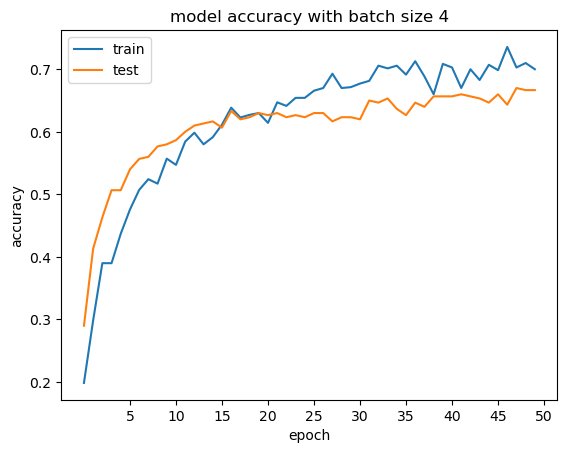

In [10]:
plt.figure(4)
plt.plot(batch_size_4.history['acc'])
plt.plot(batch_size_4.history['val_acc'])
plt.title('model accuracy with batch size 4')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 3. Design DNN for different number for hidden neurons

In [11]:
def train_diff_neurons(X, Y, no_neurons, batch_size, epoch_size, callback=[]):
    acc = []
    mean_acc =[]
    acc_idx=0
    for i in no_neurons:
        print('Train with neurons size = %d'%(i))
        for fold in range(no_folds):
            start, end = fold*nf, (fold+1)*nf
            x_test, y_test = X[start:end], Y[start:end]
            x_train  = np.append(X[:start], X[end:], axis=0)
            y_train = np.append(Y[:start], Y[end:], axis=0) 
            
            history = adam_optimizer(no_neurons=i).fit(x_train, y_train,
                                                       batch_size=batch_size,
                                                       epochs=epoch_size,
                                                       verbose=0,
                                                       use_multiprocessing=True,
                                                       callbacks=callback,
                                                       validation_data=(x_test, y_test))

            acc.append(history.history['val_acc'][epoch_size-1])
            print('fold %d test accuracy %g'%(fold, acc[acc_idx]))
            acc_idx+=1
        mean_acc.append(np.mean(acc))
        print('* mean accuracy = %g *'% np.mean(acc))
        acc.clear()
        acc_idx=0
    return mean_acc

# 3a. Plot the cross-validation accuracies against training epochs for different numbers of hidden-layer neurons.

In [12]:
no_neurons = [8, 16, 32, 64]
no_neurons_acc = train_diff_neurons(X, Y, no_neurons=no_neurons, batch_size=4, epoch_size=50, callback=[])

Train with neurons size = 8
fold 0 test accuracy 0.672673
fold 1 test accuracy 0.630631
fold 2 test accuracy 0.615616
* mean accuracy = 0.63964 *
Train with neurons size = 16
fold 0 test accuracy 0.702703
fold 1 test accuracy 0.681682
fold 2 test accuracy 0.717718
* mean accuracy = 0.700701 *
Train with neurons size = 32
fold 0 test accuracy 0.726727
fold 1 test accuracy 0.708709
fold 2 test accuracy 0.705706
* mean accuracy = 0.713714 *
Train with neurons size = 64
fold 0 test accuracy 0.726727
fold 1 test accuracy 0.696697
fold 2 test accuracy 0.747748
* mean accuracy = 0.723724 *


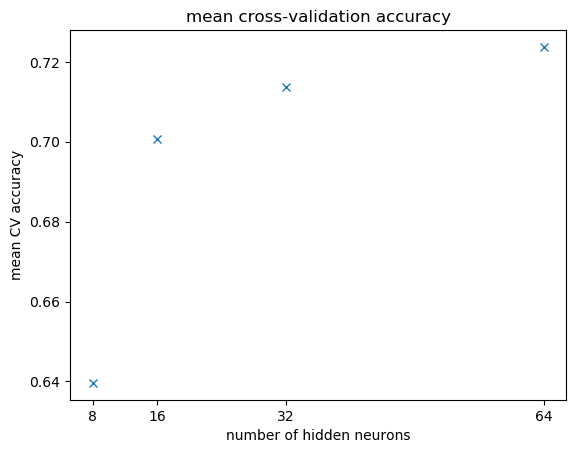

In [13]:
plt.figure(5)
plt.plot(no_neurons,no_neurons_acc,marker='x',linestyle='None')
plt.title('mean cross-validation accuracy')
plt.ylabel('mean CV accuracy')
plt.xlabel('number of hidden neurons')
plt.xticks(no_neurons)
plt.show()

# 3b. Select the optimal number of neurons for the hidden layer. State the rationale for your selection.


## Selecting 64 as the optimal number of neurons, as the model have the highest accuracy with 64 neurons.

# 3c. Plot the train and test accuracies against training epochs with the optimal number of neurons.

In [28]:
#Choosing 64 as optimal number of neurons with batch size 4

no_neurons_64 = adam_optimizer(no_neurons=64).fit(X_train, y_train,
                                                               batch_size=4,
                                                               epochs=50, 
                                                               verbose = 2, 
                                                               use_multiprocessing=True,
                                                               validation_data=(X_test, y_test))


Train on 700 samples, validate on 300 samples
Epoch 1/50
 - 1s - loss: 2.0873 - acc: 0.2586 - val_loss: 1.5781 - val_acc: 0.4500
Epoch 2/50
 - 0s - loss: 1.4701 - acc: 0.4743 - val_loss: 1.3010 - val_acc: 0.5867
Epoch 3/50
 - 0s - loss: 1.2264 - acc: 0.5943 - val_loss: 1.1867 - val_acc: 0.5900
Epoch 4/50
 - 0s - loss: 1.1374 - acc: 0.5843 - val_loss: 1.1068 - val_acc: 0.6233
Epoch 5/50
 - 0s - loss: 1.0181 - acc: 0.6643 - val_loss: 1.0569 - val_acc: 0.6233
Epoch 6/50
 - 0s - loss: 0.9403 - acc: 0.7029 - val_loss: 1.0133 - val_acc: 0.6433
Epoch 7/50
 - 0s - loss: 0.8798 - acc: 0.7200 - val_loss: 0.9616 - val_acc: 0.6400
Epoch 8/50
 - 0s - loss: 0.8263 - acc: 0.7286 - val_loss: 0.9420 - val_acc: 0.6533
Epoch 9/50
 - 0s - loss: 0.7800 - acc: 0.7271 - val_loss: 0.9265 - val_acc: 0.6567
Epoch 10/50
 - 0s - loss: 0.7345 - acc: 0.7514 - val_loss: 0.9016 - val_acc: 0.6600
Epoch 11/50
 - 0s - loss: 0.6692 - acc: 0.7757 - val_loss: 0.9016 - val_acc: 0.6600
Epoch 12/50
 - 0s - loss: 0.6973 - acc:

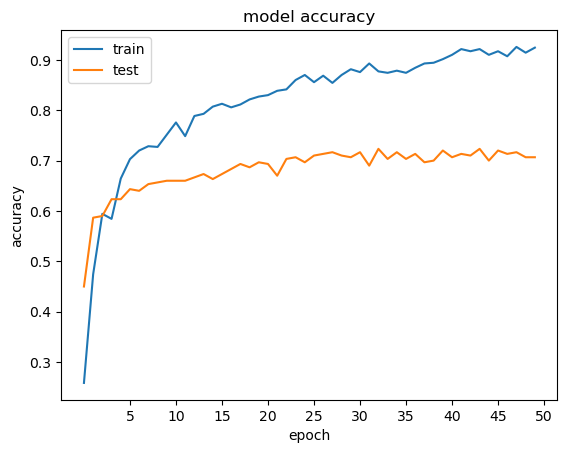

In [29]:
plt.figure(6)
plt.plot(no_neurons_64.history['acc'])
plt.plot(no_neurons_64.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 3d. What other parameters could possibly be tuned?

## Other parameters such as the learning rate and the number of hidden layers can be tuned for the model.

# 4. Design 3-layer network 

In [19]:
#DNN with 2 hidden layer 16neurons

def three_layer_network():
    network = Sequential([
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])

    network.compile(optimizer='Adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
    return network


# 4a. Plot the train and test accuracy of the 3-layer network against training epochs.

In [20]:
three_layer = three_layer_network().fit(X_train, y_train,
                               batch_size=1,
                               epochs=50, 
                               verbose = 2, 
                               use_multiprocessing=True,
                               validation_data=(X_test, y_test))

Train on 700 samples, validate on 300 samples
Epoch 1/50
 - 2s - loss: 1.9672 - acc: 0.3171 - val_loss: 1.5243 - val_acc: 0.4667
Epoch 2/50
 - 2s - loss: 1.4300 - acc: 0.4871 - val_loss: 1.2629 - val_acc: 0.5567
Epoch 3/50
 - 2s - loss: 1.2487 - acc: 0.5329 - val_loss: 1.1190 - val_acc: 0.6067
Epoch 4/50
 - 2s - loss: 1.1477 - acc: 0.5757 - val_loss: 1.0649 - val_acc: 0.6033
Epoch 5/50
 - 2s - loss: 1.0322 - acc: 0.6143 - val_loss: 1.0597 - val_acc: 0.6267
Epoch 6/50
 - 2s - loss: 0.9236 - acc: 0.6571 - val_loss: 0.9997 - val_acc: 0.6567
Epoch 7/50
 - 2s - loss: 0.8652 - acc: 0.7000 - val_loss: 1.0168 - val_acc: 0.6500
Epoch 8/50
 - 2s - loss: 0.8497 - acc: 0.6886 - val_loss: 0.9460 - val_acc: 0.6533
Epoch 9/50
 - 2s - loss: 0.7549 - acc: 0.7343 - val_loss: 0.9729 - val_acc: 0.6867
Epoch 10/50
 - 2s - loss: 0.7566 - acc: 0.7514 - val_loss: 0.9190 - val_acc: 0.7067
Epoch 11/50
 - 2s - loss: 0.8000 - acc: 0.7071 - val_loss: 0.9115 - val_acc: 0.6900
Epoch 12/50
 - 2s - loss: 0.7052 - acc:

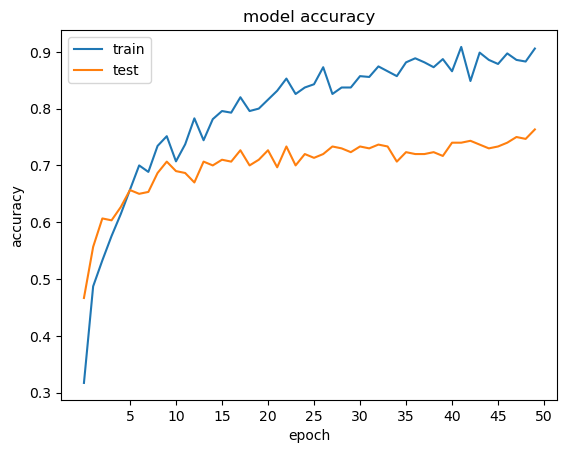

In [21]:
plt.figure(7)
plt.plot(three_layer.history['acc'])
plt.plot(three_layer.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 4b. Compare and comment on the performances of the optimal 2-layer network from your hyperparameter tuning in Question 2 and 3 and the 3-layer network.


## The 3-layer network generally have higher accuracy than the optimal 2-layer network. This shows that the adjusting the number of layers affects the accuracy more compared to hyperparameter tuning of batch size and hidden neurons from questions 2 and 3.

# 5a. Remove dropout, plot accuracies and losses on training and test data

In [30]:
#DNN without dropout

def adam_no_dropout(no_neurons):
    network = Sequential([
        Dense(no_neurons, activation='relu'),
        Dense(10, activation='softmax')
    ])

    network.compile(optimizer='Adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
    return network

In [32]:
no_dropout = adam_no_dropout(no_neurons=16).fit(X_train, y_train,
                                                 batch_size=1,
                                                 epochs=50, 
                                                 verbose = 2, 
                                                 use_multiprocessing=True,
                                                 validation_data=(X_test, y_test))

Train on 700 samples, validate on 300 samples
Epoch 1/50
 - 2s - loss: 1.9311 - acc: 0.3271 - val_loss: 1.6463 - val_acc: 0.4333
Epoch 2/50
 - 2s - loss: 1.3525 - acc: 0.5414 - val_loss: 1.3736 - val_acc: 0.5200
Epoch 3/50
 - 2s - loss: 1.1392 - acc: 0.6186 - val_loss: 1.2507 - val_acc: 0.5700
Epoch 4/50
 - 2s - loss: 0.9967 - acc: 0.6643 - val_loss: 1.1870 - val_acc: 0.5867
Epoch 5/50
 - 2s - loss: 0.8983 - acc: 0.6929 - val_loss: 1.1283 - val_acc: 0.6167
Epoch 6/50
 - 2s - loss: 0.8175 - acc: 0.7300 - val_loss: 1.1017 - val_acc: 0.6167
Epoch 7/50
 - 2s - loss: 0.7496 - acc: 0.7443 - val_loss: 1.0925 - val_acc: 0.6200
Epoch 8/50
 - 2s - loss: 0.6846 - acc: 0.7757 - val_loss: 1.1102 - val_acc: 0.6367
Epoch 9/50
 - 2s - loss: 0.6394 - acc: 0.7829 - val_loss: 1.0688 - val_acc: 0.6467
Epoch 10/50
 - 2s - loss: 0.5963 - acc: 0.8129 - val_loss: 1.0843 - val_acc: 0.6433
Epoch 11/50
 - 2s - loss: 0.5597 - acc: 0.8186 - val_loss: 1.1084 - val_acc: 0.6600
Epoch 12/50
 - 2s - loss: 0.5265 - acc:

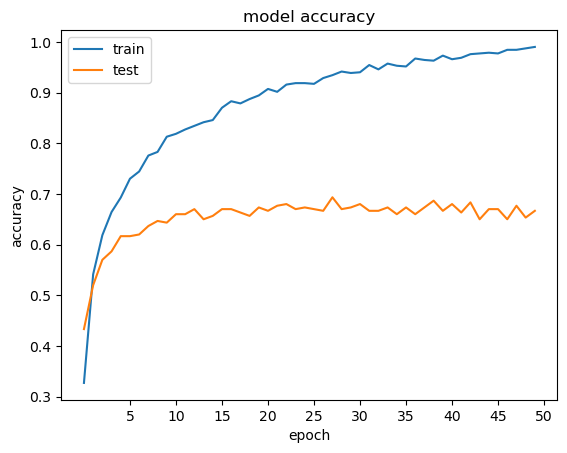

In [33]:
plt.figure(8)
plt.plot(no_dropout.history['acc'])
plt.plot(no_dropout.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

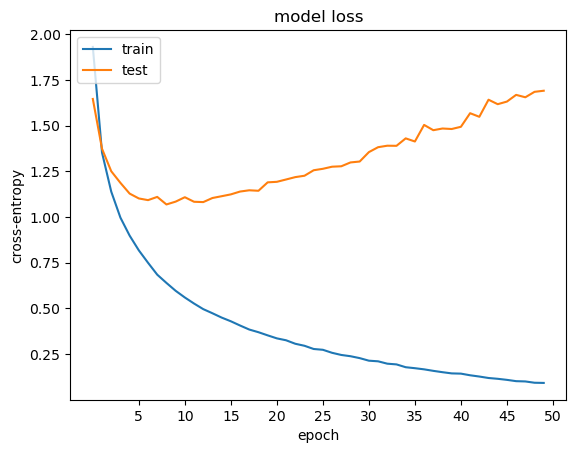

In [35]:
plt.figure(9)
plt.plot(no_dropout.history['loss'])
plt.plot(no_dropout.history['val_loss'])
plt.title('model loss')
plt.ylabel('cross-entropy')
plt.xlabel('epoch')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 5b. Explain the effect of removing dropouts.

## Without dropouts, overfitting occurs which thus the model is unable to predict correct outputs to novel inputs, which thus causing the accuracy and loss to be worst as compared to adding dropouts.

# 5c. What is another approach that you could take to address overfitting in the model?


## Using early stopping when overfitting starts to occur.

# Conclusion

## Of all the parameters tuned, adding a hidden layer is the most impactful in model performance and compared to others. A possible reason is due to having more calculations involved for better precisions and accuracies.
## A limitation of using feed forward network to predict based on features obtained can be that features of analog waves will be lost when processing factors , which results in inaccuracy.
